In [2]:
#librerias para la exploracion inicial
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# **ACERCA DEL DATASET**

In [3]:
enfermedades_cardiacas ="E:\FONDO TALENTO DIGITAL\Portafolio_GITHUB\Red Neuronal Simple\Red-Neuronal-Simple-\heart - heart.csv"
df =pd.read_csv(enfermedades_cardiacas)
df.head(3)

<>:1: SyntaxWarning: invalid escape sequence '\F'
<>:1: SyntaxWarning: invalid escape sequence '\F'
C:\Users\Usuario\AppData\Local\Temp\ipykernel_27244\3136642533.py:1: SyntaxWarning: invalid escape sequence '\F'
  enfermedades_cardiacas ="E:\FONDO TALENTO DIGITAL\Portafolio_GITHUB\Red Neuronal Simple\Red-Neuronal-Simple-\heart - heart.csv"


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0


In [4]:
df.shape
print(f"El Dataset contiene '{df.shape[0]}' filas")
print(f"El Dataset contiene'{df.shape[1]}' columnas")

El Dataset contiene '918' filas
El Dataset contiene'12' columnas


In [5]:
#verificando filas duplicadas
df.duplicated().sum()

0

In [6]:
#caracteristicas del dataset
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [7]:
#verificando valores nulos
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


La informacion inicial que obtenemos sobre el Dataset de enfermedades cardiacas es la siguiente:
* El Dataset contiene *918 filas las cuales son unicas* sin presencia de valores duplicados
* El Dataset contiene *12 columnas* o caracteristicas las cuales *no poseen ningun valor vacio o NAN*
* Contamos con *5* caracteristicas del tipo Object o categoricas y *7* caracteristicas del tipo numerico tanto Int y Float
* La variable objetivo o el target es: "HeartDisease"

# **EXPLORATORY DATA ANALYSIS**

### **ANALISIS DE LAS VARIABLES CATEGORICAS**

* Age: edad del paciente [años]
* Sex: sexo del paciente [M: masculino, F: femenino]
* ChestPainType: tipo de dolor de pecho [TA: angina típica, ATA: angina atípica, NAP: dolor no anginoso, ASY: asintomático]
* RestingBP: presión sanguínea en estado de reposo [mm Hg]
* Colesterol: colesterol sérico [mm/dl]
* FastingBS: azúcar en sangre en ayunas [1: si FastingBS > 120 mg/dl, 0: en caso contrario]
* RestingECG: resultados de electrocardiograma en reposo [Normal: normal, ST: tener una anormalidad en la onda ST-T (inversiones de onda T y/o elevación o depresión de ST de > 0.05 mV), LVH: muestra hipertrofia ventricular izquierda probable o definitiva según los criterios de Estes].
* MaxHR: máximo ritmo cardíaco alcanzado [valor numérico entre 60 y 202]
* ExerciseAngina: angina inducida por el ejercicio [Y: sí, N: no]
Oldpeak: oldpeak = ST [valor numérico medido en depresión]
* ST_Slope: la pendiente del ejercicio máximo en el segmento ST [Up: pendiente ascendente, Flat: plano, Down: pendiente descendente]
* HeartDisease: enfermedad cardíaca, clase de salida [1: enfermedad cardíaca, 0: normal

In [9]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [10]:
#renombramiento
df.rename(columns={'Age':'Edad', 'Sex':'Sexo', 
                   'ChestPainType':'TipoDolorDePecho', 
                   'RestingBP':'PresionSanguinea', 
                   'Cholesterol':'Colesterol', 
                   'FastingBS':'AzucarEnSangre',
                    'RestingECG':'ResElectrocardiograma',
                    'MaxHR':'MaxRitmoCardiaco',
                    'ExerciseAngina':'AnginaEjercicio', 
                    'Oldpeak':'DepresionDelSt', 
                    'ST_Slope':'PendienteSt',
                    'HeartDisease':'EnfermedadCardiaca'},inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Edad                   918 non-null    int64  
 1   Sexo                   918 non-null    object 
 2   TipoDolorDePecho       918 non-null    object 
 3   PresionSanguinea       918 non-null    int64  
 4   Colesterol             918 non-null    int64  
 5   AzucarEnSangre         918 non-null    int64  
 6   ResElectrocardiograma  918 non-null    object 
 7   MaxRitmoCardiaco       918 non-null    int64  
 8   AnginaEjercicio        918 non-null    object 
 9   DepresionDelSt         918 non-null    float64
 10  PendienteSt            918 non-null    object 
 11  EnfermedadCardiaca     918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [12]:
cols_categoricas =df.select_dtypes(exclude= ['int64','float64'])
for col in cols_categoricas:
    print(f"Valores unicos en la columna '{col}' ")
    print(df[col].unique())
    print()

Valores unicos en la columna 'Sexo' 
['M' 'F']

Valores unicos en la columna 'TipoDolorDePecho' 
['ATA' 'NAP' 'ASY' 'TA']

Valores unicos en la columna 'ResElectrocardiograma' 
['Normal' 'ST' 'LVH']

Valores unicos en la columna 'AnginaEjercicio' 
['N' 'Y']

Valores unicos en la columna 'PendienteSt' 
['Up' 'Flat' 'Down']



*Observamos que las variables categoricas no presentan valores redundantes o incesarios por lo cual se decide procesar a realizar graficos que nos indiquen la presencia e importancia de estos datos*

#### **GRAFICOS DE FRECUENCIA PARA LAS VARIABLES CATEGORICAS**

In [13]:
df.select_dtypes(exclude= ['int64','float64']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Sexo                   918 non-null    object
 1   TipoDolorDePecho       918 non-null    object
 2   ResElectrocardiograma  918 non-null    object
 3   AnginaEjercicio        918 non-null    object
 4   PendienteSt            918 non-null    object
dtypes: object(5)
memory usage: 36.0+ KB


##### **CATEGORIA SEXO**

C:\Users\Usuario\AppData\Local\Temp\ipykernel_27244\939927933.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=df['Sexo'], palette=['#1f77b4', '#ff7f0e'])


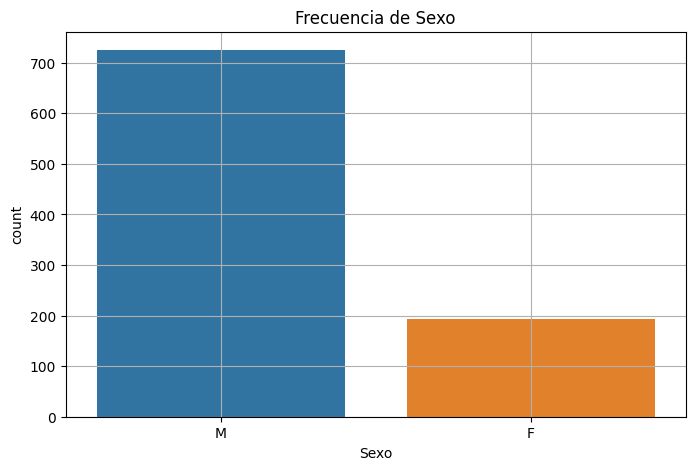

In [14]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x=df['Sexo'], palette=['#1f77b4', '#ff7f0e'])
plt.title(f'Frecuencia de Sexo')
plt.grid()
plt.show()

In [15]:
df['Sexo'].value_counts()

Sexo
M    725
F    193
Name: count, dtype: int64

En base a este grafico de la distribucion de frecuencia en la categoria de sexo inferimos lo siguiente:
* La poblacion masculina es la que sufre mas enfermedades cardiacas superando significativamente a la población femenina, observando una diferencia por encima de 500 personas.
* Se debe tener principal enfasis en la poblaciónj masculina.

##### **CATEGORIA DEL TIPO DE DOLOR DE PECHO**

In [16]:
frecuencia = df["TipoDolorDePecho"].value_counts()
frecuencia

TipoDolorDePecho
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

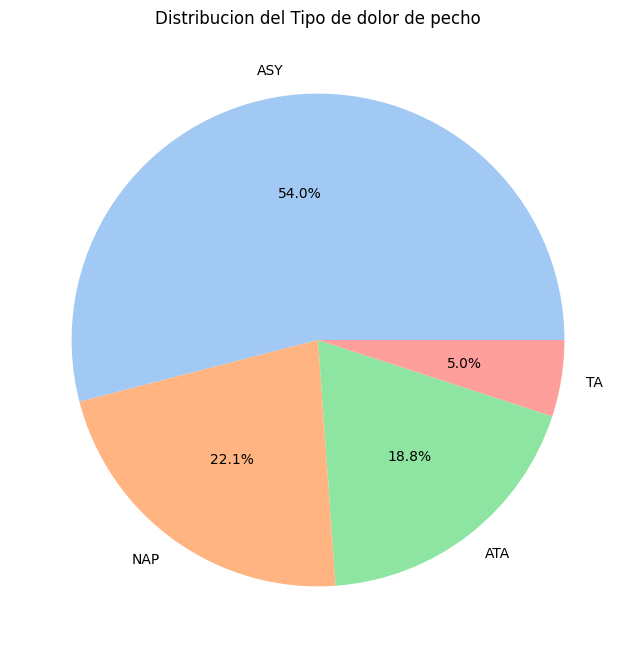

In [17]:
plt.figure(figsize=(8,8))
plt.pie(frecuencia,labels=frecuencia.index,autopct='%1.1f%%', 
        colors=sns.color_palette('pastel'))
plt.title("Distribucion del Tipo de dolor de pecho")
plt.show()

En base a este grafico de pastel inferimos lo siguiente:
* El principal dolor de pecho que presentan la poblacion en estudio es el dolor del tipo ASY("Asintomatico") el cual representa mas del 50% de ocurrencias en la poblacion de estudio.
* EL otro 50% lo representasn los demas tipos de dolores en el precho dentro de los cuales el dolor tipo NAP("Dolor no asignado") tiene una incidencia del 22.1% en la población seguido por muy poco del dolor del tipo ATA("Angina atipica") representado por el 18.8% en el nivel de incidencia.
* El tipo de dolor TA("Angina Tipica") es el que tiene menor incidencia en la población.

### **ANALISIS DE LAS VARIABLES NUMERICAS**

In [18]:
df.select_dtypes(exclude='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Edad                918 non-null    int64  
 1   PresionSanguinea    918 non-null    int64  
 2   Colesterol          918 non-null    int64  
 3   AzucarEnSangre      918 non-null    int64  
 4   MaxRitmoCardiaco    918 non-null    int64  
 5   DepresionDelSt      918 non-null    float64
 6   EnfermedadCardiaca  918 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 50.3 KB


In [21]:
cols_numericas =df.select_dtypes(exclude='object')
for col_numerica in cols_numericas:
    print(f"Valores unicos de la columna '{col_numerica}' :")
    print(df[col_numerica].unique)
    

Valores unicos de la columna 'Edad' :
<bound method Series.unique of 0      40
1      49
2      37
3      48
4      54
       ..
913    45
914    68
915    57
916    57
917    38
Name: Edad, Length: 918, dtype: int64>
Valores unicos de la columna 'PresionSanguinea' :
<bound method Series.unique of 0      140
1      160
2      130
3      138
4      150
      ... 
913    110
914    144
915    130
916    130
917    138
Name: PresionSanguinea, Length: 918, dtype: int64>
Valores unicos de la columna 'Colesterol' :
<bound method Series.unique of 0      289
1      180
2      283
3      214
4      195
      ... 
913    264
914    193
915    131
916    236
917    175
Name: Colesterol, Length: 918, dtype: int64>
Valores unicos de la columna 'AzucarEnSangre' :
<bound method Series.unique of 0      0
1      0
2      0
3      0
4      0
      ..
913    0
914    1
915    0
916    0
917    0
Name: AzucarEnSangre, Length: 918, dtype: int64>
Valores unicos de la columna 'MaxRitmoCardiaco' :
<bound meth

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Edad,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
PresionSanguinea,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Colesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
AzucarEnSangre,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxRitmoCardiaco,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
DepresionDelSt,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
EnfermedadCardiaca,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


array([[<Axes: title={'center': 'Edad'}>,
        <Axes: title={'center': 'PresionSanguinea'}>,
        <Axes: title={'center': 'Colesterol'}>],
       [<Axes: title={'center': 'AzucarEnSangre'}>,
        <Axes: title={'center': 'MaxRitmoCardiaco'}>,
        <Axes: title={'center': 'DepresionDelSt'}>],
       [<Axes: title={'center': 'EnfermedadCardiaca'}>, <Axes: >,
        <Axes: >]], dtype=object)

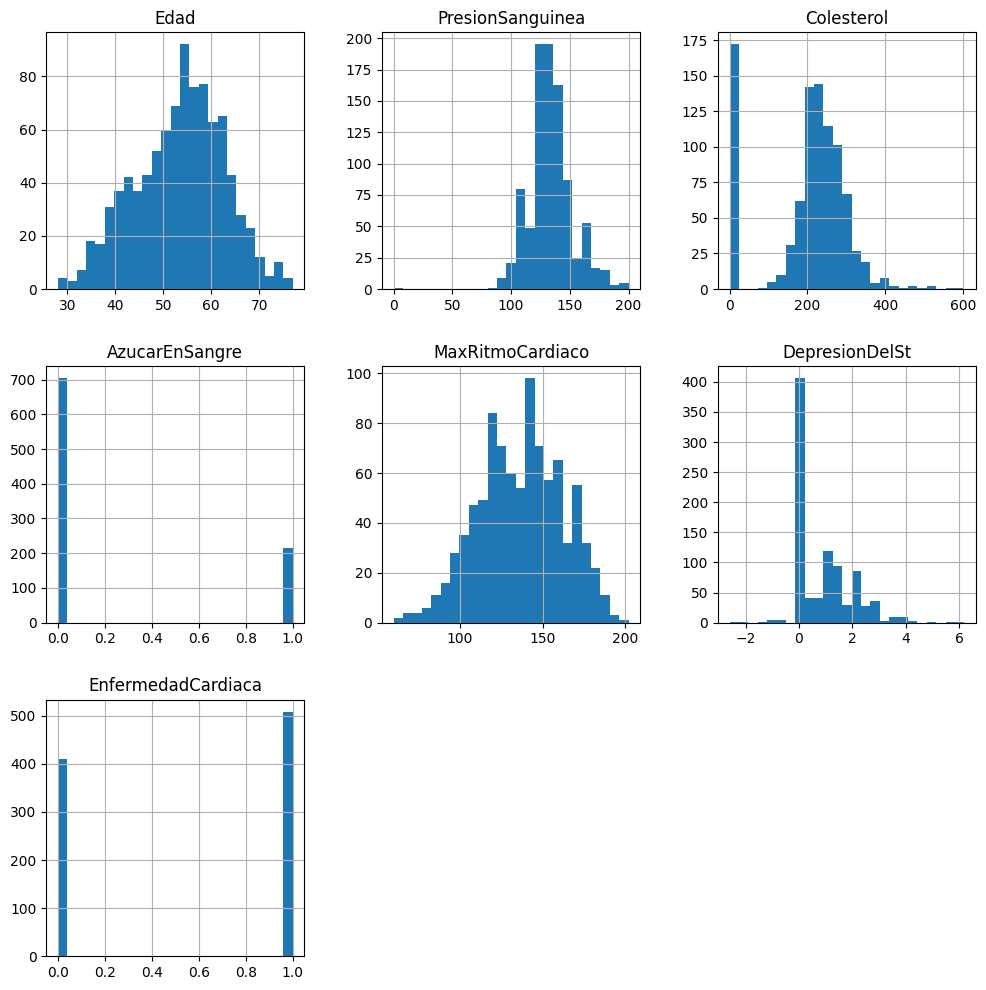

In [23]:
df.hist(bins=25,figsize=(12,12),xlabelsize='10',ylabelsize='10')

En base al histograma observamos que existe sesgo de valores en las columnas de edad, presion sanguinea,colesterol,MaxRitmoCardiaco y DepresionDelSt, asi mismo observamos que las columnas de valores binarios son las de Azucar en sangre y nuestro target de Enfermedad Cardiaca, en base a esto inferimos que las columnas numericas en nuestro dataset no presentan una distribucion normal de valores, por lo cual se decide hacer un mapa de calor para poder identificar la correlacion y ve que features elegirt para nuestro modelo

In [25]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),cmap=sns.diverging_palette(240,10,n=9),annot=True,fmt='.1f',vmin=-1,vmax=1)

ValueError: could not convert string to float: 'M'

<Figure size 1200x1200 with 0 Axes>